## Library Step

In [1]:
# @title Import libraries

## Autenticación en GCP-BQ
from google.colab import auth
from google.cloud import bigquery

## Manejo de data y estadísticos
import pandas as pd
import numpy as np

## Graficación y carga de datasets populares
import seaborn as sns

## Extract Step

In [ ]:
# @title Set project, location, client y auth
project = 'meli-bi-data' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)

# Nos va a solicitar que autorizemos explicitamente el acceso con nuestras credenciales nominales:
auth.authenticate_user()

In [ ]:
# @title Print Query
job = client.get_job('bquxjob_72037176_18b059f0d37')
print(job.query)

-- DS sencillo para llevar a capacitación sobre Python
SELECT 
  SR.SIT_SITE_ID SITE_ID,
  SR.SHP_LG_FACILITY_ID FACILITY_ID,
  CAST(DATE_TRUNC(SHP_LG_ROUTE_INIT_DATE, quarter) AS DATE) QUARTER,
  CAST(DATE_TRUNC(SR.SHP_LG_ROUTE_INIT_DATE , month) AS DATE) MONTH,
  CASE 
    WHEN SR.SHP_LG_SHIPMENT_SUB_STATUS IN('delivered','delivered_place') THEN 'DELIVERED' -- SHP_LG_SHIPMENT_SUB_STATUS
    WHEN SR.SHP_LG_SHIPMENT_SUB_STATUS IN ('lost','missing') THEN 'PERDIDOS' 
    ELSE 'NOT DELIVERED' END AS DS,
  COUNT(SR.SHP_SHIPMENT_ID) QTY_SHIPMENTS
FROM 
  `meli-bi-data.WHOWNER.BT_SHP_LG_SHIPMENTS_ROUTES` SR
WHERE 
  1=1
  AND SR.SHP_LG_ROUTE_INIT_DATE BETWEEN '2023-07-01' AND '2023-09-30' 
  AND SR.SHP_LG_SHIPMENT_SUB_STATUS NOT IN ('transferred') 
GROUP BY 
  1,2,3,4,5
ORDER BY 
  3,4,1,2 ASC
;


#### ¿Donde encuentro el job id en BQ?

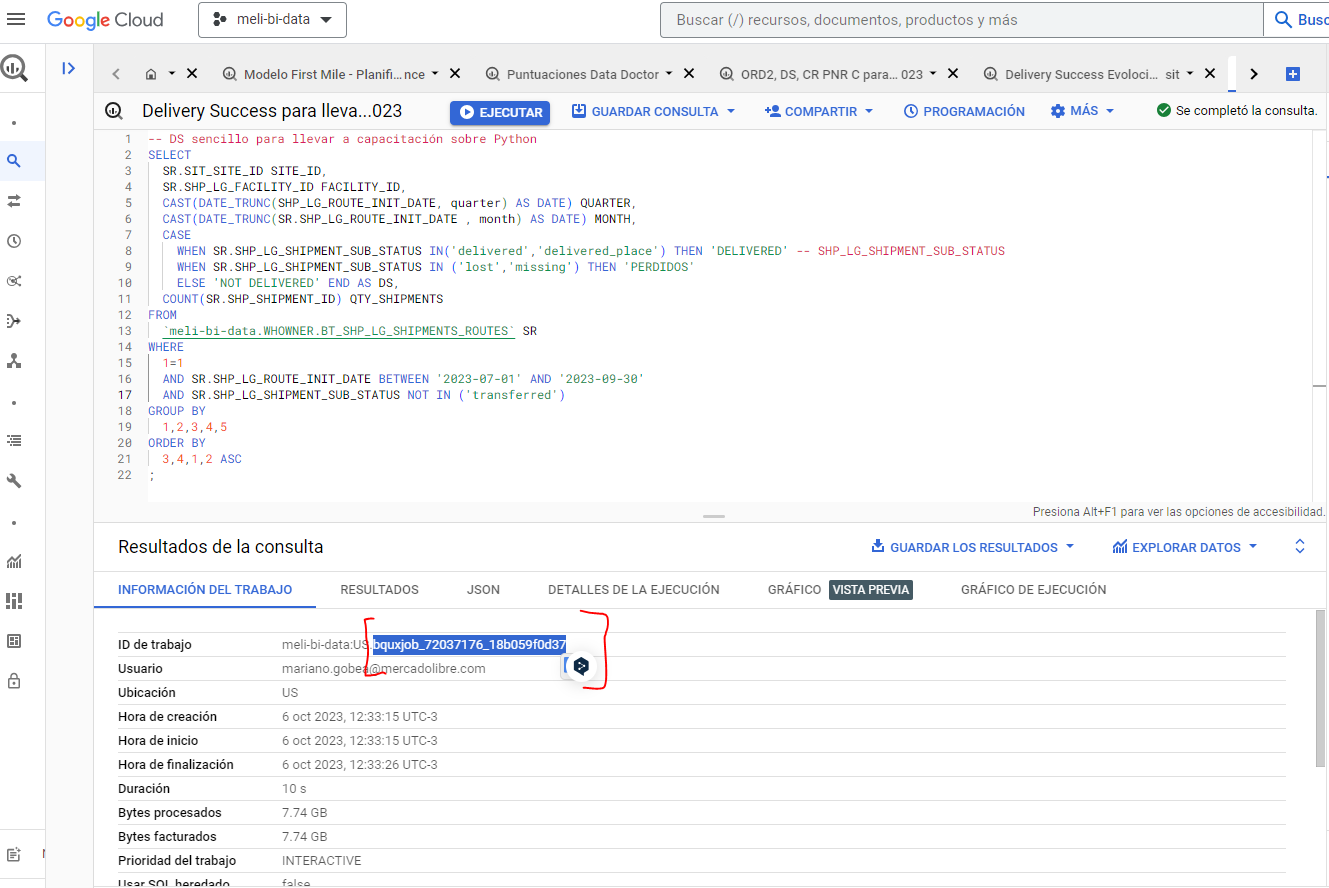

In [ ]:
# @title Transformed the BQ Job in Pandas DataFrame
df = job.to_dataframe()
df.head(10)

,SITE_ID,FACILITY_ID,QUARTER,MONTH,DS,QTY_SHIPMENTS
0,None,SAM1,2023-07-01,2023-07-01,NOT DELIVERED,74
1,None,SAN1,2023-07-01,2023-07-01,NOT DELIVERED,22
2,None,SBA1,2023-07-01,2023-07-01,NOT DELIVERED,1512
3,None,SBA3,2023-07-01,2023-07-01,NOT DELIVERED,461
4,None,SBO1,2023-07-01,2023-07-01,NOT DELIVERED,41
5,None,SCN1,2023-07-01,2023-07-01,NOT DELIVERED,68
6,None,SCO1,2023-07-01,2023-07-01,NOT DELIVERED,61
7,None,SC_ZS,2023-07-01,2023-07-01,NOT DELIVERED,1238
8,None,SDF1,2023-07-01,2023-07-01,NOT DELIVERED,87
9,None,SES3,2023-07-01,2023-07-01,NOT DELIVERED,83


### Dado que la anterior Query sería comprendida por Shipping, pero dificilmente por las demás BU's vamos a trabajar en esta oportunidad con un dataset muy popular en el mundo de la Ciencia de Datos que es el de los pasajeros del titanic

## Inspect Step

In [2]:
# @title Cargo el dataframe del titanic:
df = sns.load_dataset('titanic')

In [3]:
# @title Veo las primeras 5 rows/filas
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### ¿Que información tiene cada columna del DataFrame?

1. survived: outcome of survival (0 = No; 1 = Yes)
2. pclass: socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
4. sex: sex of the passenger
5. age: age of the passenger (Some entries contain NaN)
6. sibsp: number of siblings and spouses of the passenger aboard
7. parch: number of parents and children of the passenger aboard
9. fare: fare paid by the passenger
10. embarked: initial letter of ship port
11. class: class in which the passenger traveled
12. who: passenger gender
13. adult_male: tag that verifies whether it is a male adult
14. deck: deck of his flagship
15. embark_town: city/town in which the passenger boarded
16. alive: boolean indicating whether it survived or not
17. alone: boolean indicating whether you boarded alone or not

In [ ]:
# @title Imprimo informacion de tipo de datos del df y sobre la existencia de datos nulos en el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# @title Calculo promedio de edad de los pasajeros del Titanic
round(df['age'].mean(),0)

30.0

In [ ]:
# @title Calculo la suma de todas las tarifas pagadas para embarcar al titanic
df['fare'].sum()

28693.9493

In [ ]:
# @title Veo los principales estadísticos para cada una de las columnas numericas
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# @title Veo información descriptiva de mis variables categóricas:
df.describe(include=object)

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [ ]:
# @title Imprimo las primeras lineas de una única columna
df['embark_town'].head()

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: embark_town, dtype: object

In [ ]:
# @title Resumen de cantidad de datos para cada valor de la columna
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [ ]:
# @title Filtro una columna por un valor
df[df['age'] < 18] # Me quedo solamente con los pasajeros menores de edad

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,0,3,male,4.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
852,0,3,female,9.0,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


In [ ]:
# @title Puedo filtrar también por 2 variable o más:
df[(df['age'] > 18) & (df['sex'] == 'female')] # Me quedo solo con las mujeres mayores.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


## Transform Step
Para mas informacion entrar a:   
https://sites.google.com/mercadolibre.com/wiki-biops/inicio/fda/transform

In [ ]:
# @title Filtro el df por una variable y la guardo como un nuevo DataFrame
df_filtrado = df[df['age'] < 18]
df_filtrado.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False


In [ ]:
# @title Creo una columna nueva
df['tag_legal_age'] = df['age'] > 18
df.sample(7) # Otra forma de ver solo algunas columnas pero de manera aleatoria

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,tag_legal_age
580,1,2,female,25.0,1,1,30.0000,S,Second,woman,False,NaN,Southampton,yes,False,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,False
569,1,3,male,32.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,yes,True,True
449,1,1,male,52.0,0,0,30.5000,S,First,man,True,C,Southampton,yes,True,True
283,1,3,male,19.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,yes,True,True
619,0,2,male,26.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True,True
749,0,3,male,31.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True,True


In [ ]:
# @title Sumo dos columnas y genero una columna nueva
df['family_on_board'] = df['sibsp']+df['parch']
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,tag_legal_age,family_on_board
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True,0


In [5]:
# @title Group By
## Puedo agrupar por una variable categórica y calcular sobre otra numérica

df_group_by_sex = df.groupby("sex").mean()
df_group_by_sex

<ipython-input-5-d47887685b2b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_by_sex = df.groupby("sex").mean()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


**Por default vendrán todas las columnas numéricas con su promedio calculado. Pero puedo seleccionar solo la/s que me interesen**

In [9]:
# @title Group By Column Selected
df_group_by_sex = df.groupby("sex")["survived","age"].mean()
df_group_by_sex

<ipython-input-9-b52eb3630da3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group_by_sex = df.groupby("sex")["survived","age"].mean()


,survived,age
sex,,
female,0.742038,27.915709
male,0.188908,30.726645


In [11]:
# @title Group By with distinct metrics

# Realiza un groupby por la columna "sex" y aplica las funciones mean() y max()
result = df.groupby("sex").agg({"survived": "mean",
                                "age": "mean",
                                "fare": "max"})

# Renombra las columnas resultantes
result = result.rename(columns={"survived": "survived_mean",
                                "age": "age_mean",
                                "fare": "fare_max"})

result

,survived_mean,age_mean,fare_max
sex,,,
female,0.742038,27.915709,512.3292
male,0.188908,30.726645,512.3292


In [12]:
# @title Pivot Table

## Si necesitamos hacer calculos sobre el entrecruze de dos variables entonces usamos pivot_table:
df_pivot = df.pivot_table(index=["sex"],
                          columns=["class", "alone"],
                          values=["survived","age","fare"],
                          aggfunc={"survived":"mean",
                                   "age":"median",
                                   "fare":"min"})

df_pivot


age                                     fare                        \
class  First       Second        Third          First          Second         
alone  False True   False  True  False True     False    True   False True    
sex                                                                           
female  35.0  32.5   25.5  32.25  19.5  22.0  26.2833  25.9292   13.0  10.5   
male    37.0  45.0   29.0  30.00  17.5  27.0  29.7000   0.0000   11.5   0.0   

                      survived                                          \
class    Third           First              Second               Third   
alone    False True      False     True      False     True      False   
sex                                                                      
female  7.7500  6.75  0.966667  0.970588  0.931818  0.906250  0.416667   
male    6.4958  0.00  0.425532  0.333333  0.277778  0.097222  0.180723   

                  
class             
alone      True   
sex               
female  0.616667  
male    0.121212

## Challenges:

1. Crea una nueva columna en el dataset quue valide si se trata de una pasajera mujer y mayor de edad y llamala "adult_female"
2. Calcula la tarifa promedio que se pagó para embarcarse en el titanica
3. Calcula la tarifa mediana que se pagó para embarcarse(vas a tener que recurrir a la [documentación de numpy](https://https://numpy.org/doc/stable/reference/generated/numpy.median.html), a [ChatGPT](https://https://chat.openai.com) o a tu imaginación si te animas! Es muy facil!)